<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/L7_Anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Body Motion \& Collisions

### <font color='Red'> **Caleb Anderson** </font>


### <font color='Red'> **06 December 2024** </font>

# Objective

### To Understand Velocity Verlet Applied to 2-body systems, including their mutual interaction and thus their inevitable collisions.

# Introduction


## **2 Body Motion**
### So far we have only considered motion of a single particle. We know that reality is more complex, and thus here we consider our largest system yet, 2 particles! Both of these particles have their own equation-of-motion \begin{align} m_1\ddot{\mathbf{x}}_1 &= \mathbf{f}_{12} \\ m_2\ddot{\mathbf{x}}_2 &= \mathbf{f}_{21} \end{align} for positions of particle $\mathbf{x}_1$ and $\mathbf{x}_2$ respectively, interacting with a force between the particles $\mathbf{f}(\mathbf{x}_1, \mathbf{x}_2)$. Instead of a two-variable force, we may decrease the degrees-of-freedom by defining the inter-particle displacement: \begin{align} \Delta \mathbf{x}_{12} &= \mathbf{x}_1 - \mathbf{x}_2 \quad.\end{align} Therefore the inter-particle force is instead $\mathbf{f}(\mathbf{x}_{12})$ which is shortened to $\mathbf{f}(\mathbf{x}_{12}) = \mathbf{f}_{12}$. Note by virtue of Newton's 3rd Law, the force acting on particle 2 is the opposite: $\mathbf{f}_{21} = -\mathbf{f}_{12}$.


### In order to alleviate the abstraction, here we consider a common and simple two-body interaction force of a spring. That is the aforementioned force is: \begin{align} \mathbf{f}(\mathbf{x}_{12}) = \mathbf{f}_{12} = 4\mathscr{E}\left( \frac{12}{R^{13}} - \frac{6}{R^{7}}\right)\frac{\Delta \mathbf{x}_{12}}{R},\quad\quad\quad R = |\mathbf{x}_{12}| = |\mathbf{x}_{21}|. \end{align} The parameter $\mathscr{E}$ is a scalar in units of energy, and describes the cohesive energy of this potential.

## **Momentum-Verlet**
### Here we consider the Momentum-Verlet integrator, with the equations of:\begin{align} \mathbf{x}(t+1) &= \mathbf{x}(t) + \left( \mathbf{p}(t) \,dt + \mathbf{f}(t) \frac{dt^2}{2} \right) \frac{1}{m} \\ \mathbf{f}(t+1) &= \,\,.... \\ \mathbf{p}(t+1) &= \mathbf{p}(t) + \frac{\left( \mathbf{f}(t) + \mathbf{f}(t+1) \right) \,dt}{2} \end{align} applied at every time-step.


## **Energy of the System**
### We now may calculate the energy of the system. We may partition the energy into 1-body and 2-body contributions. Here the 1-body contribution is known as the *kinetic-energy*, it is considered a 1-body contribution because it is only a function of each body independent of one another. Its functional form, in terms of momentum is: \begin{align} K &= \frac{\mathbf{p}^2_1}{2m} + \frac{\mathbf{p}^2_2}{2m} \quad. \end{align} Next the 2-body contribution, is the energy of the interaction, this is known as the *potential-energy*. It exists by virtue of the partciles not being in isolation, but interacting with something. Notice its functional form cannot be seperated like the kinetic-energy (1-body interaction): \begin{align} U(R) &= 4\mathscr{E} \left( \frac{1}{R^{12}} - \frac{1}{R^{6}} \right) \quad\quad.\end{align} With $\mathscr{E}$ is the same parameter defined earlier. Notice that we may apply: \begin{align} f_{12} &= - \frac{\partial U(R)}{\partial R} \,\frac{ \Delta \mathbf{x}_{12} }{R} \quad, \\ f_{21} &= - \frac{\partial U(R)}{\partial R} \,\frac{ \Delta \mathbf{x}_{21} }{R}\quad. \end{align}


## **Collisions**
### Now we consider collisions between the two particles. For a closed system (one with no friction) the total energy and momentum must be conserved. Here we will be considering closed collisions with the aforementioned Lennhard-Jones interaction.


## **Elastic Collisions**
### An elastic collision is an event whereby the particles exchange momentum, but the total kinetic energy is conserved.

## **Inelastic Collisions**
### An inelastic collision is an event whereby the particles exchange momentum, but the total kinetic energy is **not** conserved (although for closed systems the total energy is conserved). This means for inelastic collisions some kinetic energy was converted to potential energy.

### In particular, we would like to see a collision of two particles/bodies, after which they are bound with each other (as shown in the example).

## Simulation Tips

### For clearer simulation demonstration of elastic collisions should have alot of initial kinetic energy (larger initial velocities), the inelastic simulation should have low initial kinetic energy (smaller initial velocities).

### Make sure you have a sufficiently small time-step $\delta t$ to fully capture the collision-event.

### Let's import the necessary modules

In [1337]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy import arange, array, zeros

π = np.pi

## Example Code for Collisions

In [1338]:
Δt = 0.001 ## s(detector)
T  = arange(0, 10, Δt)

m_i  = array([2., 4.]) ## kg (masses of both particles)
R_ix = array([[-1., 0., 0.],[4., 0., 0.]]) ## m (positions of both particles)
V_ix = array([[2.50, 0., 0.],[0., 0., 0.]]) ## m/s (velocities of both particles)

p_ix  = m_i[:, None]*V_ix ## kg m / s (momentum of both particles)
f_ix  = zeros((2,3)) ## N (forces between both particles)

### empty arrays to save data
R_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) ) ## 2-particle position-trajectory
p_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) ) ## 2-particle velocity-trajectory
K_t   = zeros(len(T)) ## kinetic energy in time
U_t   = zeros(len(T)) ## potential energy in time
for t in range(len(T)): ## Momentum-Verlet Integrator For-loop

    R_ix  += (p_ix * Δt + f_ix * Δt**2/2)/m_i[:, None] ## calculate new position vector
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1] ## inter-particle displacement vector
    R      = norm(Δx) ## distance (norm of the displacement-vector)
    F_ix   = 150*(12/R**13 - 6/R**7) * array([Δx, -Δx])/R  ## calculate the force between particles

    p_ix  += ( f_ix + F_ix ) * Δt/2  ## calculate new momentum vector
    f_ix   = F_ix ## previous force = new force

    K_t[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U_t[t]   = 150*(1/R**12 - 1/R**6) ## save potential energy

## Plots

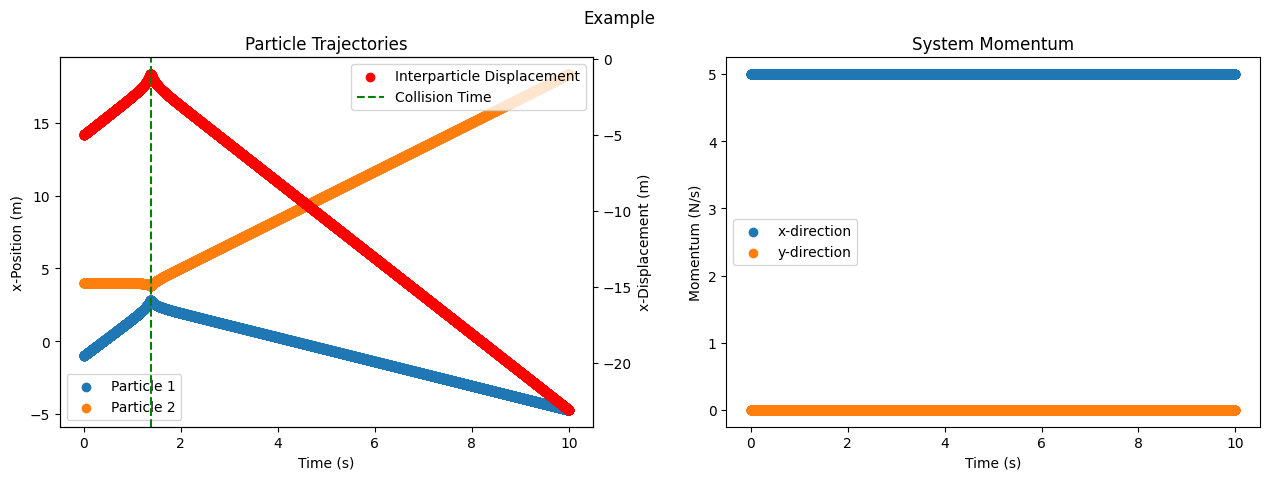

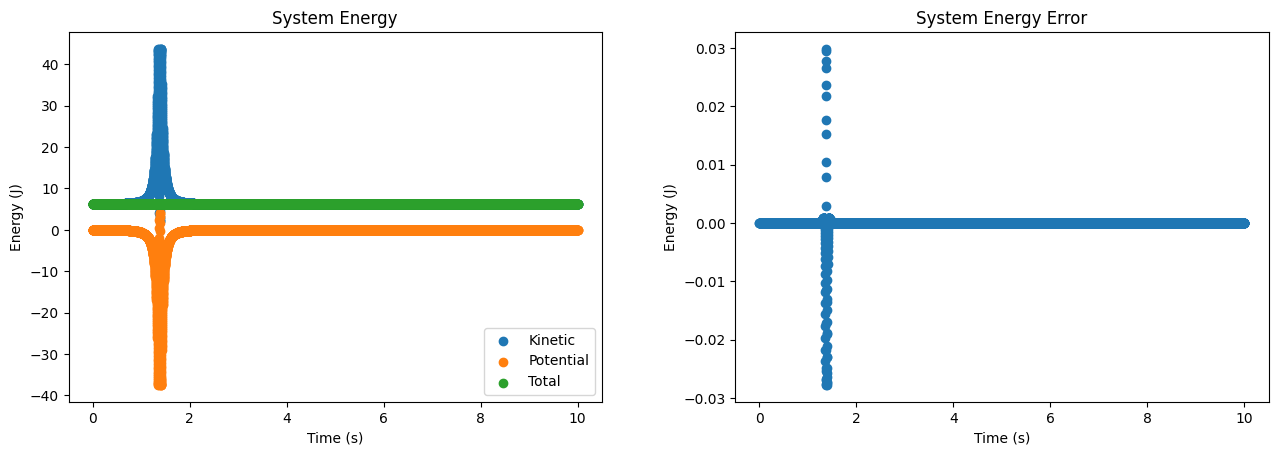

In [1339]:
fig1, (ax1, ax3) = plt.subplots(1, 2)
fig1.suptitle('Example', x=1)
fig1.subplots_adjust(hspace=0.25, wspace=0.25, right=2)

### position-trajectory plot
ax1.scatter(T, R_tix[:, 0, 0], label="Particle 1")
ax1.scatter(T, R_tix[:, 1, 0], label="Particle 2")
ax1.set_title("Particle Trajectories")
ax1.set(xlabel='Time (s)', ylabel='x-Position (m)')
ax1.legend(loc="lower left")

ax2 = ax1.twinx()
### interparticle displacement plot
R_tx=R_tix[:, 0, 0]-R_tix[:, 1, 0]
ax2.scatter(T, R_tx, color='red', label='Interparticle Displacement')
ax2.axvline(x=(np.where(R_tx==np.max(R_tx))[0]*Δt), linestyle='dashed', color='green', label='Collision Time')
ax2.legend(loc="upper right")
ax2.set(ylabel='x-Displacement (m)')

### momentum in time
p_tx = np.sum(p_tix, axis=1)
ax3.scatter(T, p_tx[:,0], label="x-direction")
ax3.scatter(T, p_tx[:,1], label="y-direction")
ax3.set_title("System Momentum")
ax3.set(xlabel='Time (s)', ylabel='Momentum (N/s)')
ax3.legend(loc='center left')

fig1.show()

fig2, (ax4, ax5) = plt.subplots(1, 2)
fig2.subplots_adjust(hspace=0.25, wspace=0.25, right=2)

ax4.scatter(T, K_t, label="Kinetic")
ax4.scatter(T, U_t, label="Potential")
ax4.scatter(T, K_t+U_t, label="Total")
ax4.set_title("System Energy")
ax4.set(xlabel='Time (s)', ylabel='Energy (J)')
ax4.legend(loc="lower right")

ax5.scatter(T, (K_t+U_t) - (K_t+U_t)[0])
ax5.set_title("System Energy Error")
ax5.set(xlabel='Time (s)', ylabel='Energy (J)')

fig2.show()

#   <font color='Red'> **Elastic Scattering** </font>


###   <font color='Red'> Code: for the 2-body Velocity-Verlet Elastic Simulation </font>


In [1340]:
Δt = 0.001 ## s (detector temporal resolution)
T = arange(0, 10, Δt) ## s

γ    = 0.00
m_i  = array([1., 1.]) ## kg
R_ix = array([[-20., 0., 0.],[20., 0., 0.]]) ## m
v_ix = array([[10.0, 0., 0.],[0, 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = zeros((2,3)) ## N
### empty arrays to save data
R_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
K     = zeros(len(T))
U     = zeros(len(T))
for t in range(len(T)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2 / 2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 + 6/R**7) * array([Δx, -Δx])/R - γ * p_ix

    p_ix  += ( f_ix + F_ix ) * Δt / 2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 + 1/R**6)

###   <font color='Red'> Plots </font>


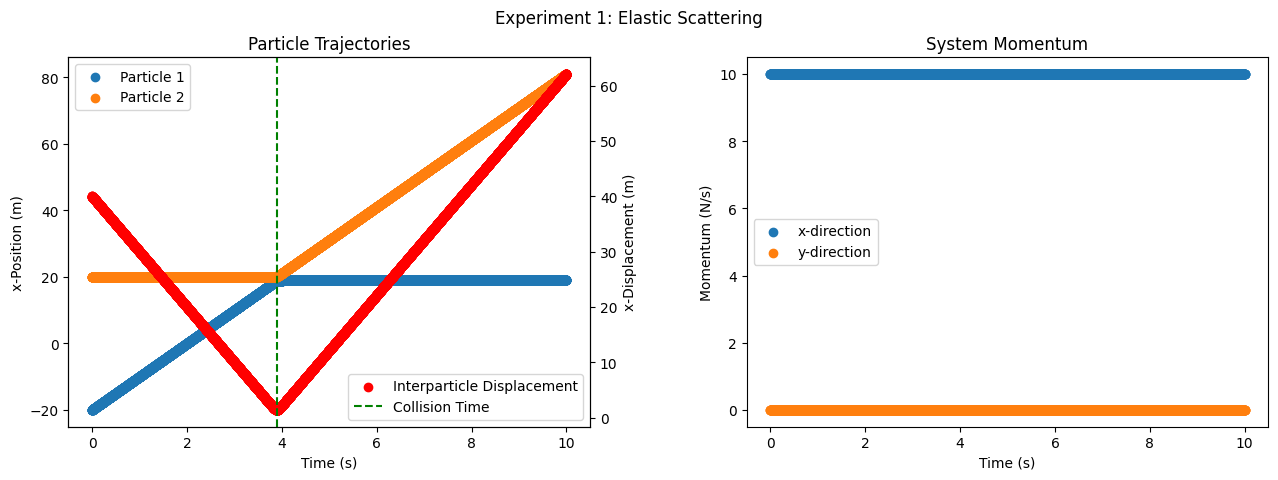

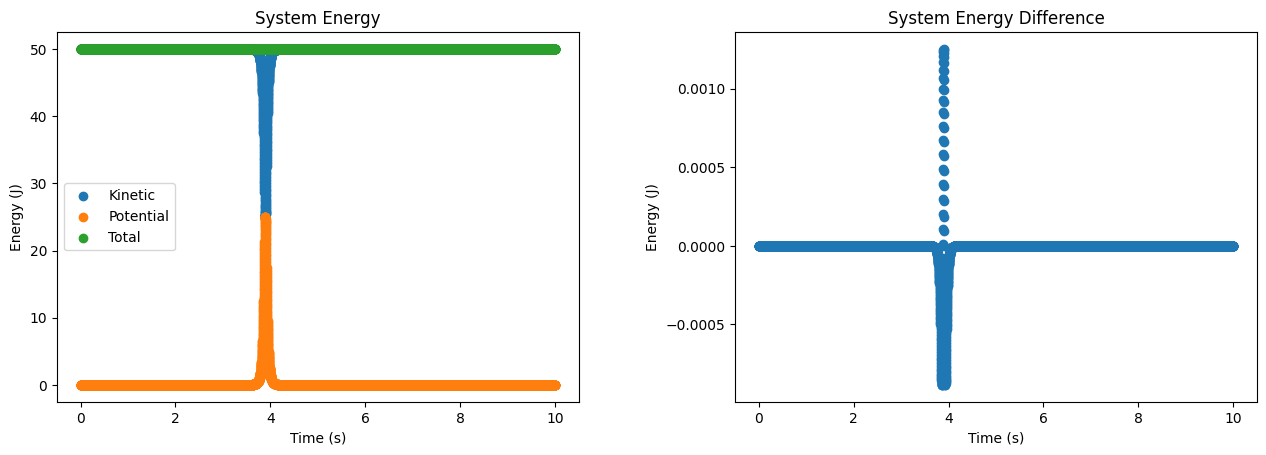

In [1341]:
fig1, (ax1, ax3) = plt.subplots(1,2)
fig1.suptitle('Experiment 1: Elastic Scattering',x=1)
fig1.subplots_adjust(hspace=0.25, wspace=0.3, right=2)

ax1.scatter(T, R_tix[:, 0, 0], label="Particle 1")
ax1.scatter(T, R_tix[:, 1, 0], label="Particle 2")
ax1.set_title("Particle Trajectories")
ax1.set(xlabel='Time (s)', ylabel='x-Position (m)')
ax1.legend(loc="upper left")

ax2 = ax1.twinx()

R_tx=-(R_tix[:, 0, 0]-R_tix[:, 1, 0])
ax2.scatter(T, R_tx, color='red', label='Interparticle Displacement')
ax2.axvline(x=(np.where(R_tx==np.min(R_tx))[0]*Δt), linestyle='dashed', color='green', label='Collision Time')
ax2.set(ylabel='x-Displacement (m)')
ax2.legend(loc="lower right")

p_tx = np.sum(p_tix, axis=1)
ax3.scatter(T, p_tx[:,0], label="x-direction")
ax3.scatter(T, p_tx[:,1], label="y-direction")
ax3.set_title("System Momentum")
ax3.set(xlabel='Time (s)', ylabel='Momentum (N/s)')
ax3.legend(loc='center left')

fig1.show()

fig2, (ax4, ax5) = plt.subplots(1, 2)
fig2.subplots_adjust(hspace=0.25, wspace=0.3, right=2)

ax4.scatter(T, K, label="Kinetic")
ax4.scatter(T, U, label="Potential")
ax4.scatter(T, K+U, label="Total")
ax4.set_title("System Energy")
ax4.set(xlabel='Time (s)', ylabel='Energy (J)')
ax4.legend(loc="center left")

ax5.scatter(T, (K+U) - (K+U)[0])
ax5.set_title("System Energy Difference")
ax5.set(xlabel='Time (s)', ylabel='Energy (J)')

fig2.show()

Experiment 1 considers the elastic scattering of two particles. Particle 1 has a mass of 1 kg, initial position of x = -20 m, and initial velocity of 10 m/s. Particle 2 has a mass of 1 kg, initial position of x = 20 m, and initial velocity of 0 m/s. Because the modeling depends on a spring-like interaction, there are some artifacts of the graphs that are more relevant than others. For this experiment, I first emphasize how in Particle Trajectories the particles move towards each other, instantatneously occupy the same location, and then move in opposite directions again. This traces out the expected path of particles in an elastic collision exactly. Next, given that all motion is in the x-direction, System Momentum shows that the net momementum of the system is all in the x-direction, and that there is no leakage or contributions from hidden dimensions as we move on to considering the energy of the system. Simultaneously, System Momentum validates Conservation of Momentum as both the zero and non-zero momentums stay constant. Moving on to System Energy, keep in mind again that we are mainly concerned with all times *except* the collision because of modeling constraints. Therefore, notice how during these periods all contributions to the Total System Energy come from its Kinetic Energy, and further notice that the Kinetic Energy remains constant. Conservation of Kinetic Energy was another expected result for an elastic collision, and the models validate that. Lastly, System Energy Error graphs the difference between the intial Total Sysem Energy and its value at every other time. Again, for the valid periods (all time except the collision), we see that there is never a difference between the Total System Energy and its initial value. This is consistent with Conservation of Energy in general.

#   <font color='Red'> **Inelastic Scattering** </font>


###   <font color='Red'> Code: for the 2-body Velocity-Verlet Inelastic Simulation </font>

In [1342]:
Δt = 0.001 ## s(detector)
tf = 25
T = arange(0, tf, Δt)

γ    = 0.00
m_i  = array([1, 1]) ## kg
R_ix = array([[-1., 0., 0.],[4., 0., 0.]]) ## m
v_ix = array([[0.005, 0., 0.],[0, 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = zeros((2,3)) ## N
### empty arrays to save data
R_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
K     = zeros(len(T))
U     = zeros(len(T))
for t in range(len(T)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2/2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 - 6/R**7) * array([Δx, -Δx])/R - γ * p_ix

    p_ix  += ( f_ix + F_ix ) * Δt/2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 - 1/R**6)

###   <font color='Red'> Plots </font>


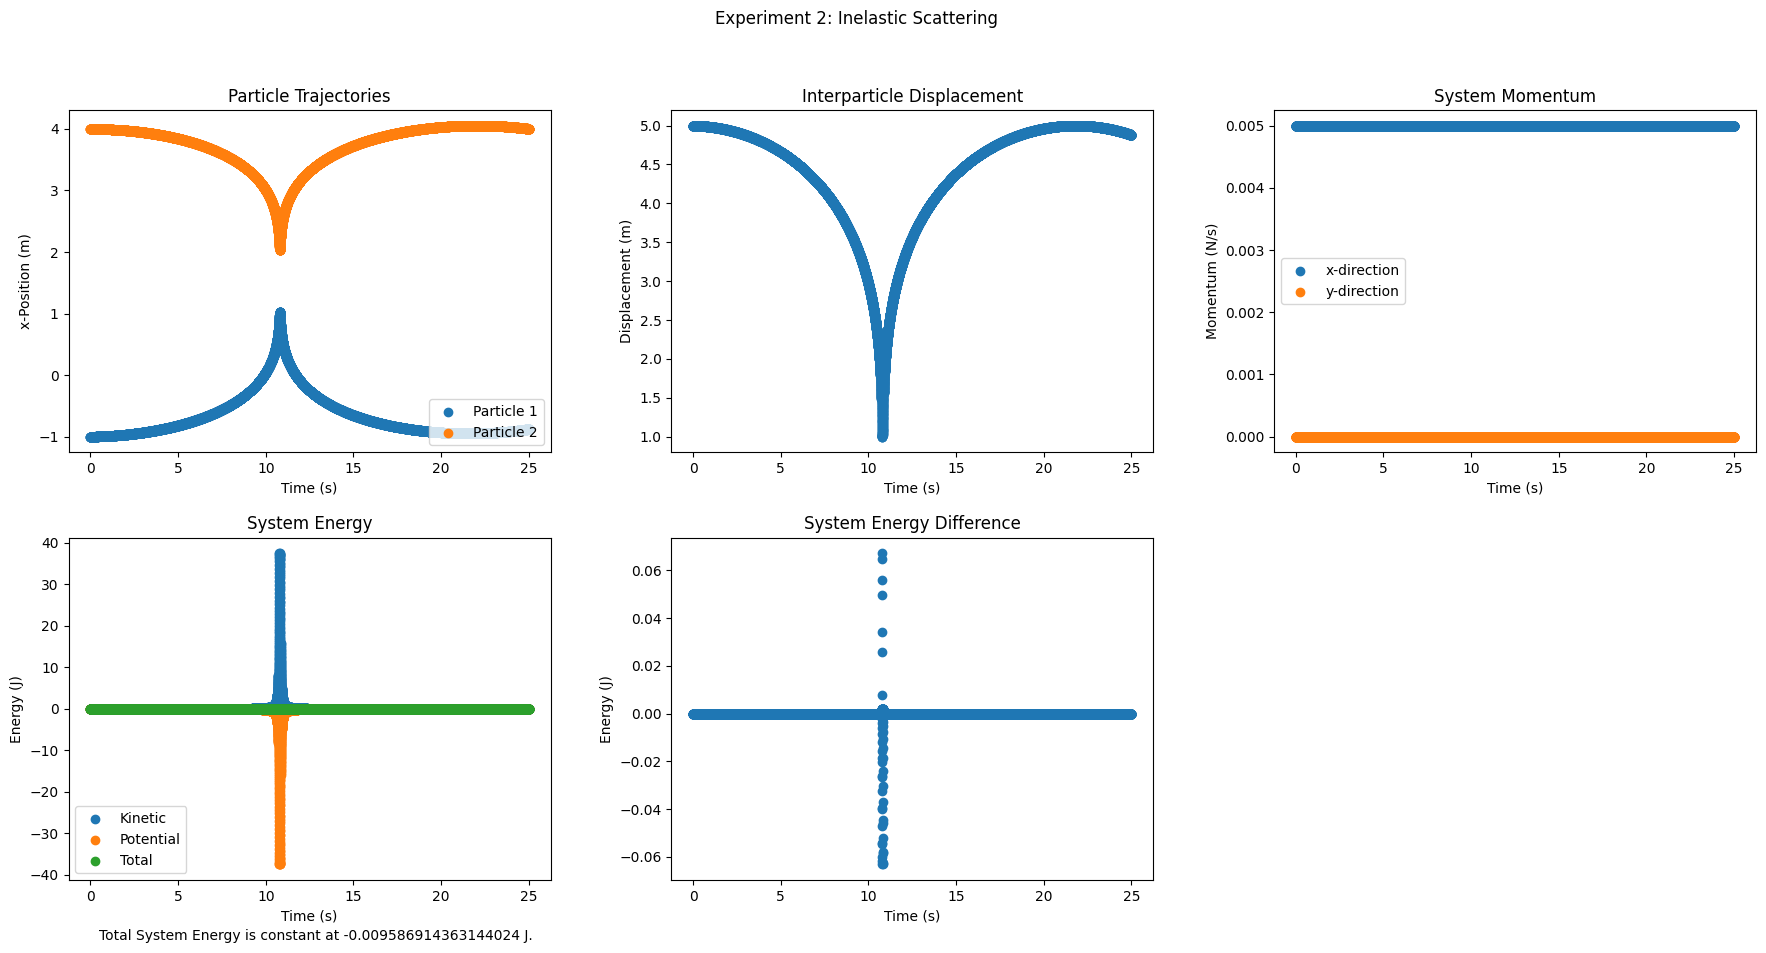

In [1343]:
fig, exp3 = plt.subplot_mosaic([['ax1', 'ax2', 'ax3'],['ax4','ax5','.']])
fig.set_size_inches(9,10)
fig.suptitle('Experiment 2: Inelastic Scattering',x=1)
fig.subplots_adjust(hspace=0.25, wspace=0.25, right=2)

exp3['ax1'].scatter(T, R_tix[:, 0, 0], label="Particle 1")
exp3['ax1'].scatter(T, R_tix[:, 1, 0], label="Particle 2")
exp3['ax1'].set_title("Particle Trajectories")
exp3['ax1'].set_xlabel("Time (s)")
exp3['ax1'].set_ylabel("x-Position (m)")
exp3['ax1'].legend(loc="lower right")

exp3['ax2'].scatter(T, -(R_tix[:, 0, 0]-R_tix[:, 1, 0]))
exp3['ax2'].set_title("Interparticle Displacement")
exp3['ax2'].set_xlabel("Time (s)")
exp3['ax2'].set_ylabel("Displacement (m)")

p_tx = np.sum(p_tix, axis=1)
exp3['ax3'].scatter(T, p_tx[:,0], label="x-direction")
exp3['ax3'].scatter(T, p_tx[:,1], label="y-direction")
exp3['ax3'].set_title("System Momentum")
exp3['ax3'].set_xlabel("Time (s)")
exp3['ax3'].set_ylabel("Momentum (N/s)")
exp3['ax3'].legend(loc='center left')

exp3['ax4'].scatter(T, K, label="Kinetic")
exp3['ax4'].scatter(T, U, label="Potential")
exp3['ax4'].scatter(T, K+U, label="Total")
exp3['ax4'].set_title("System Energy")
exp3['ax4'].set_xlabel('Time (s)')
exp3['ax4'].set_ylabel('Energy (J)')
exp3['ax4'].legend(loc="lower left")

exp3['ax5'].scatter(T, (K+U) - (K+U)[0])
exp3['ax5'].set_title("System Energy Difference")
exp3['ax5'].set_xlabel('Time (s)')
exp3['ax5'].set_ylabel('Energy (J)')

fig.text(0.4, 0.05, "Total System Energy is constant at " + str((K+U)[0]) + " J.", ha='center')
fig.show()

Experiment 2 considers the inelastic scattering of two particles. Particle 1 has a mass of 1 kg, initial position of x = -1 m, and initial velocity of 0.005 m/s. Particle 2 has a mass of 1 kg, initial position of x = 4 m, and initial velocity of 0 m/s. Because the modeling depends on a spring-like interaction, there are some artifacts of the graphs that are more relevant than others. The most relevant peiod for Experiment 2 is the exact opposite of Experiment1, i.e., the period of the collision. In Particle Trajectories I therefore draw attention to the motion of the particles in the most broad sense, in that they move towards each other initially and at some point reach a minimum displacement (see Interparticle Displacement). This is not exactly the path of particles in a perfectly inelastic collision (they would at the very least be expected to move together post-collision). In this case, the momentum and energy graphs will be the most meaningful. System Momentum shows again that total and x-directional momentum is constant because motion is constrained to the x-direction and because of Conservation of Momentum, which is not violated even in a perfectly inelastic collision. Moving on to System Energy, keep in mind again that we are mainly concerned with **no** times other than the period around the collision. Therefore, notice how during this period Total System Energy is maintained, even as there is a tradeoff between the Kinetic and Potential Energy of the system many orders of magnitude greater (note the disclaimer above thecome from its Kinetic Energy, and further notice that the Kinetic Energy remains constant. Conservation of Kinetic Energy was another expected result for an elastic collision, and the models validate that. Lastly, System Energy Error graphs the difference between the intial Total Sysem Energy and its value at every other time. Again, for the valid periods (all time except the collision), we see that there is never a difference between the Total System Energy and its initial value. This is consistent with Conservation of Energy in general.

#   <font color='Red'> **Inelastic Scattering Open** </font>


### There are two primary methods for inelastic collisions, kinetic-energy into potential-energy (total-energy conserved) or via friction (heat or deformation, i.e. total-energy not conserved). Here we will consider both. The potential-energy contribution

### For the kinetic-energy ⇒ potential-energy, the total energy is conserved, and the result is the kinetic turns into potential-energy which binds the two particles.

### Frictional force considered here depends on velocity via Stokes' Law: \begin{align*} \mathbf{f} &= -\gamma \,\mathbf{p} \quad\quad. \end{align*}

###   <font color='Red'> Inelastic Simulation, set $\gamma \ne 0.0$, Get trajectory </font>

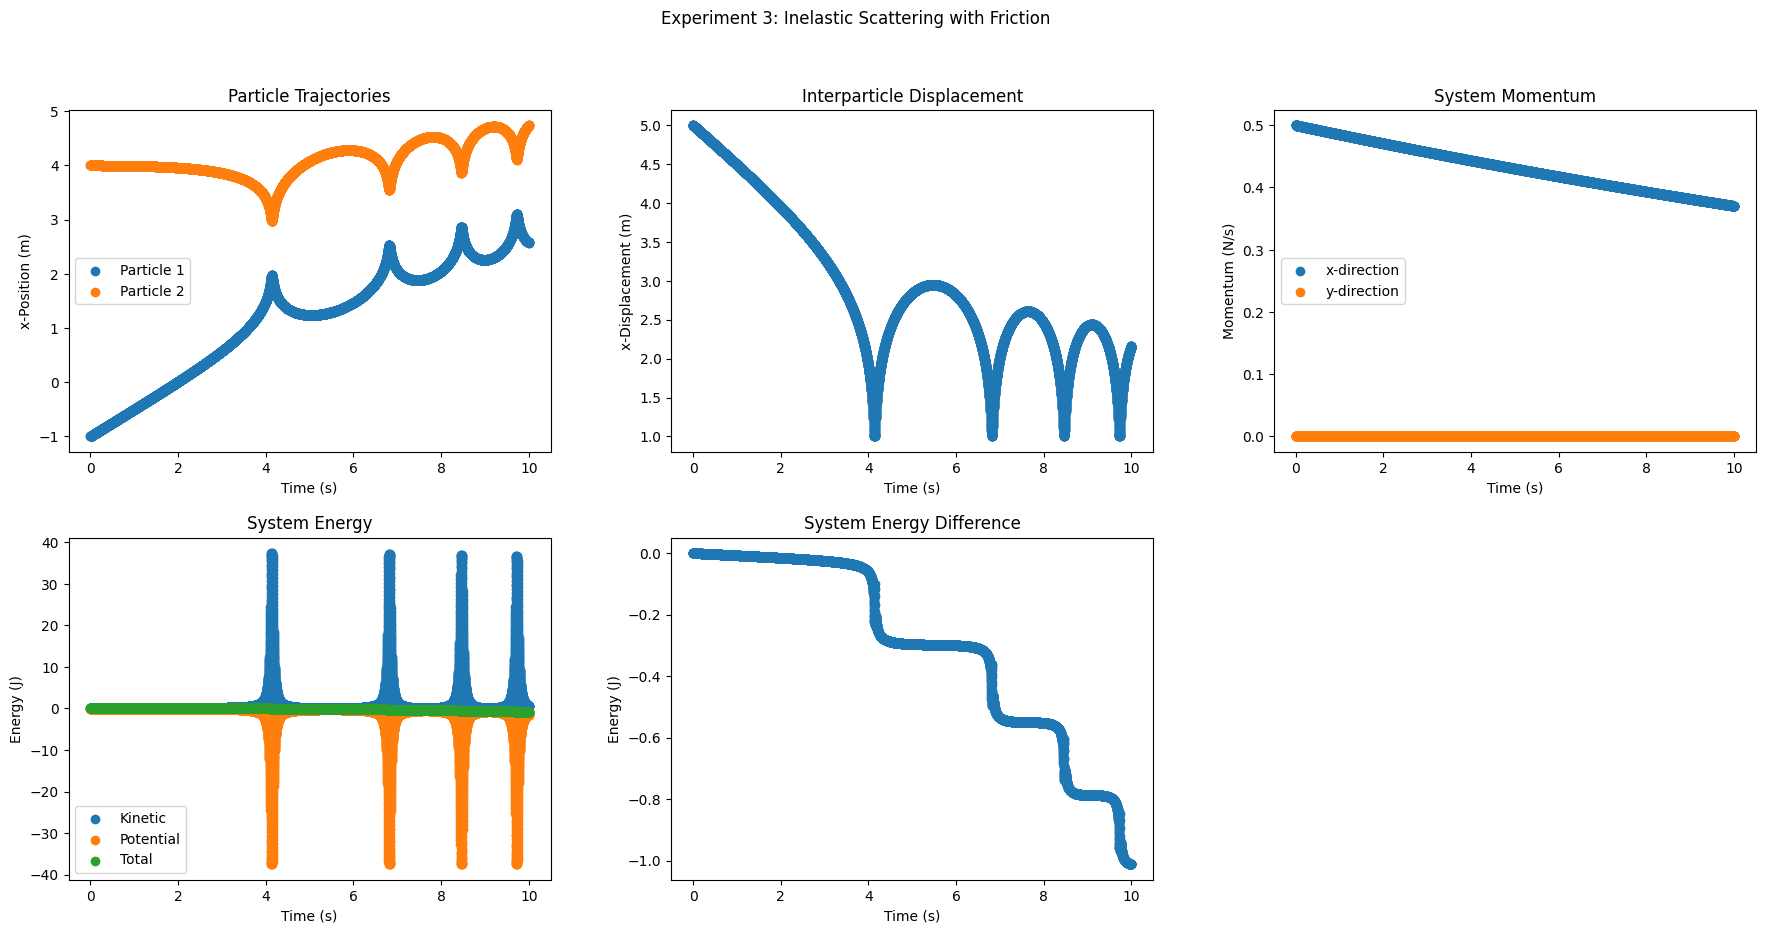

In [1344]:
Δt = 0.001 ## s(detector)
tf = 10
T  = np.arange(0, tf, Δt)

γ    = 0.03
m_i  = array([1., 1.]) ## kg
R_ix = array([[-1., 0., 0.],[4., 0., 0.]]) ## m
v_ix = array([[0.5, 0., 0.],[0, 0., 0.]]) ## m/s

p_ix  = m_i[:, None]*v_ix ## kg m / s
f_ix  = zeros((2,3)) ## N
### empty arrays to save data
R_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
p_tix = zeros( (len(T), R_ix.shape[0], R_ix.shape[1] ) )
K     = zeros(len(T))
U     = zeros(len(T))
for t in range(len(T)):

    R_ix  += (p_ix * Δt + f_ix * Δt**2 / 2)/m_i[:, None]
    R_tix[t] = 1.*R_ix ## save trajectory
    p_tix[t] = 1.*p_ix ## save momentums

    Δx     = R_ix[0] - R_ix[1]
    R      = norm(Δx)
    F_ix   = 150*(12/R**13 - 6/R**7) * np.array([Δx, -Δx])/R - γ * p_ix

    p_ix  += ( f_ix + F_ix ) * Δt / 2
    f_ix   = F_ix

    K[t]   = np.sum(p_ix[0]**2) / (2*m_i[0]) + np.sum(p_ix[1]**2) / (2*m_i[1]) ## save kinetic energy
    U[t]   = 150*(1/R**12 - 1/R**6)

fig, exp4 = plt.subplot_mosaic([['ax1', 'ax2', 'ax3'],['ax4','ax5','.']])
fig.set_size_inches(9,10)
fig.suptitle('Experiment 3: Inelastic Scattering with Friction',x=1)
fig.subplots_adjust(hspace=0.25, wspace=0.25, right=2)

exp4['ax1'].scatter(T, R_tix[:, 0, 0], label="Particle 1")
exp4['ax1'].scatter(T, R_tix[:, 1, 0], label="Particle 2")
exp4['ax1'].set_title("Particle Trajectories")
exp4['ax1'].set_xlabel("Time (s)")
exp4['ax1'].set_ylabel("x-Position (m)")
exp4['ax1'].legend(loc="center left")

exp4['ax2'].scatter(T, -(R_tix[:, 0, 0]-R_tix[:, 1, 0]))
exp4['ax2'].set_title("Interparticle Displacement")
exp4['ax2'].set_xlabel("Time (s)")
exp4['ax2'].set_ylabel("x-Displacement (m)")

p_tx = np.sum(p_tix, axis=1)
exp4['ax3'].scatter(T, p_tx[:,0], label="x-direction")
exp4['ax3'].scatter(T, p_tx[:,1], label="y-direction")
exp4['ax3'].set_title("System Momentum")
exp4['ax3'].set_xlabel("Time (s)")
exp4['ax3'].set_ylabel("Momentum (N/s)")
exp4['ax3'].legend(loc='center left')

exp4['ax4'].scatter(T, K, label="Kinetic")
exp4['ax4'].scatter(T, U, label="Potential")
exp4['ax4'].scatter(T, K+U, label="Total")
exp4['ax4'].set_title("System Energy")
exp4['ax4'].set_xlabel('Time (s)')
exp4['ax4'].set_ylabel('Energy (J)')
exp4['ax4'].legend(loc="lower left")

exp4['ax5'].scatter(T, (K+U) - (K+U)[0])
exp4['ax5'].set_title("System Energy Difference")
exp4['ax5'].set_xlabel('Time (s)')
exp4['ax5'].set_ylabel('Energy (J)')

fig.show()

#   <font color='Red'> **Conclusion** </font>


##  <font color='Red'> Q1: What is an elastic collision between 2-particles? </font>

##  <font color='Red'> Q2: What is an inelastic collision between 2-particles with friction? </font>